In [ ]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import pandas as pd
from myst_nb import glue
from src import plotting_template

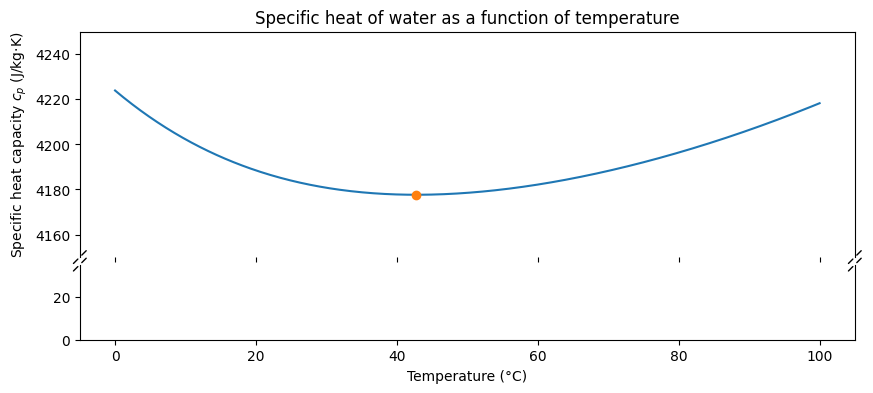

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Try to import glue (optional)
from myst_nb import glue

# Molar mass of water in kg/mol
M_WATER = 0.01801528

# Shomate coefficients for liquid water, 298–500 K (NIST)
# Cp(molar) [J/mol/K] = A + B*t + C*t^2 + D*t^3 + E/t^2,  t = T[K]/1000
A = -203.6060
B = 1523.290
C = -3196.413
D = 2474.455
E = 3.855326

def cp_water_mass(T_celsius):
    """
    Specific heat capacity of liquid water at 1 bar as a function of temperature.
    Input:  T_celsius (float or array), temperature in °C
    Output: cp in J/(kg·K)
    """
    T_kelvin = T_celsius + 273.15
    t = T_kelvin / 1000.0
    cp_molar = A + B*t + C*t**2 + D*t**3 + E / (t**2)   # [J/mol/K]
    return cp_molar / M_WATER                            # [J/kg/K]

# Temperature range 0–100 °C
T = np.linspace(0.0, 100.0, 500)
cp = cp_water_mass(T)

# Find and mark the minimum
idx_min = int(np.argmin(cp))
T_min = float(T[idx_min])
cp_min = float(cp[idx_min])

def break_mark(ax, x, y, dx=6, dy=6):
    """Draw a pair of parallel diagonal break marks at (x,y) in axes-fraction coords."""
    props = dict(arrowstyle='-', color='k', lw=1)
    ax.annotate('', xy=(x, y), xycoords='axes fraction',
                xytext=( dx,  dy), textcoords='offset points',
                arrowprops=props, annotation_clip=False)
    ax.annotate('', xy=(x, y), xycoords='axes fraction',
                xytext=(-dx, -dy), textcoords='offset points',
                arrowprops=props, annotation_clip=False)

# Broken y-axis: top 3/4, bottom 1/4
fig, (ax_top, ax_bot) = plt.subplots(
    2, 1, sharex=True,
    gridspec_kw={"height_ratios": [3, 1], "hspace": 0.05},
    figsize=(10, 4)
)

# Plot on both axes
ax_top.plot(T, cp)
ax_bot.plot(T, cp)

# Mark the minimum on both axes (only visible where it falls)
ax_top.plot([T_min], [cp_min], marker='o')
ax_bot.plot([T_min], [cp_min], marker='o')

# Y-limits: bottom shows 0 baseline; top shows the interesting band
ax_top.set_ylim(4150, 4250)   # requested: start at 4150
ax_bot.set_ylim(0, 35)

# Labels/title
ax_bot.set_xlabel("Temperature (°C)")
ax_top.set_ylabel(r"Specific heat capacity $c_p$ (J/kg·K)")
ax_top.set_title("Specific heat of water as a function of temperature")

# Hide the touching spines
ax_top.spines.bottom.set_visible(False)
ax_bot.spines.top.set_visible(False)
ax_top.tick_params(labeltop=False)
ax_bot.xaxis.tick_bottom()

# Break marks (slashes)
break_mark(ax_top, 0, 0)
break_mark(ax_top, 1, 0)
break_mark(ax_bot, 0, 1)
break_mark(ax_bot, 1, 1)

glue("cp_water_fig", fig, display=False)


# Temperature and Heat

```{admonition} Relevant readings and preparation:
:class: reading
- Concept in Thermal Physics: Chapter 2, Chapter 4: 4.1, 4.2
- University Physics with Modern Physics 15th edition: Chapter 17: Section 17.1-17.2, 17.4-17.5, Chapter 18: Section 18.4
```

```{admonition} Learning outcomes:
:class: outcomes
- Concepts of heat and heat capacity
- Heat is "thermal energy in transit"
- Heat capacity is given by $C = dQ/dT$ and can also be expressed per unit volume or mole, termed the *specific* heat capacity
- Temperature, $T$, of a system
- Zeroth law of thermodynamics
- Temperature scales: Celsius vs Kelvin
- Introduction to phase transitions
```

## Heat

We all have an intuitive idea of what heat is. While sitting near a fire in winter or standing in the sun, we feel the warmth increasing our temperature, or conversely touching a cold snowball makes our hand feel cool as heat leaves it. From these observations, we understand heat as a form of energy transfer between objects at different temperatures. Heat represents energy moving from one body to another because of a temperature difference, not something an object possesses by itself.

```{admonition} Definition:
:class: definition
Heat is thermal energy in transit
```

Heat is emitted spontaneously from all objects, though the net energy transfer (**heat flow**) will always be in the direction from a warmer body to a cooler one. This direction can be reversed if external energy is supplied, such as in a refrigerator or freezer where electrical power forces heat to move from the cold interior to the warmer surroundings. Thus, the definition of heat focuses on transfer itself, without assuming a specific direction.

The phrase “in transit” is important because while you can add heat to an object, you cannot say the object contains heat. Heat cannot be stored or measured directly like fuel in a tank. It only exists while energy is being transferred. What an object actually contains is internal energy, which can change through heating or doing work.

For example, you can warm your cold hands by holding them near a fire (adding heat) or by rubbing them together (doing work). In both cases, their temperature rises, showing that both heat and work increase internal energy.

As we do not give heat a direction, we instead need to designate bodies or *systems* that heat is transferred to or from.

In this course, we adopt the sign convention:

- Heat added is positive ($Q > 0$)
- Heat removed is negative ($Q < 0$)

```{figure} ../src/figures/2.2_contact.png
:name: fig:contact
:width: 40%
Simply put, if our *system* is $T_H$, heat is leaving the system, therefore Q is negative. If instead our system is $T_C$, Q is positive.
```

Heat is measured in **joules (J)**, and the **rate of heating** is measured in **watts (W)** where 1 W = 1 Js<sup>-1</sup>.

```{admonition} Example:
:class: example
A (very efficient) hairdryer (1.5kW) is used for 5 minutes. The total heat released is:

- $Q = 1500 \text{W} * (5 * 60 \text{s}) = 450 \text{kJ} $

"Total heat released" refers to heat entering the environment, therefore our 'system' is the environment and "Q" is positive. The dryer performed 450 kJ of work *on* the environment by converting its electrical energy to thermal energy, or *heat*. 
```

(sec:capacity)=
## Heat Capacity

In the previous section, we defined heat as energy in transit. We now consider how this heat affects the internal energy of the system, and how much must be added to an object to raise its temperature. The relationship between the amount of heat supplied and the resulting temperature change is described by the heat capacity.

```{admonition} Definition:
:class: definition
For a body that receives a small amount of heat $dQ$, producing a temperature change $dT$, we relate the two by the heat capacity $C$:

$$ C = dQ/dT \qquad [\text{J K}^{-1}] $$
```

Heat capacity represents the amount of heat required to raise the object's temperature by one kelvin. It is a property of the entire object, depending on its size and composition. To compare different materials, it is often more useful to express heat capacity **per unit mass**. This is called the **specific heat capacity** $c$, where $c = C / m$, measured in units of J kg<sup>-1</sup> K<sup>-1</sup>.

```{admonition} Example:
:class: example
If 0.125 kg of water at 18 °C has a total heat capacity $C$ of 523 J K<sup>-1</sup>, then its specific heat capacity is $c = 523 / 0.125 = 4184\ \text{J kg}^{-1}\ \text{K}^{-1}$

This value agrees with the known $c$ of water, one of the highest capacities among common substances. Consider something traditionally dense like lead -- its $c$ is only 129 J kg<sup>-1</sup> K<sup>-1</sup>, even $c$ half of water, sitting at just 2093 J kg<sup>-1</sup> K<sup>-1</sup>!

```
Another useful quantity is the molar heat capacity, or the heat capacity per mole of substance. For water, whose molar mass is 18 g mol<sup>-1</sup>, the molar heat capacity is found by multiplying the specific heat capacity by the molar mass: 

$$ C*m = 4.18 * 10^3\ \text{J kg}^{-1}\ \text{K}^{-1} * 0.018\ \text{kg mol}^{-1} = 75.2\ \text{J mol}^{-1}\ \text{K}^{-1}. $$

When dealing with gases, two different heat capacities are defined depending on the conditions:

- $C_v$: the heat capacity at constant volume, where the gas does not expand as it is heated.
- $C_p$: the heat capacity at constant pressure, where the gas is allowed to expand.

Because some of the supplied heat goes into doing work when the gas expands at constant pressure, $C_p$ is always larger than $C_v$. 

The specific heat capacity $c$ is not absolute and varies slightly based on the initial temperature and the temperature interval. This variation is quite small so we'll be ignoring it for this course.

```{glue:figure} cp_water_fig
:name: fig-cp-water
:width: 80%
Note that the value of *c* curves, but the variation in the curve is less than 1% between $0 ^\circ C$ and $100 ^\circ C$.
```


<!-- [[NOTE]] i think this should all be alongside 1st law??

## Work and heat in thermodynamic processes

[[FIG OF GAS EXPANDING IN ISOLATED SYSTEM]]

A gas expands from $V \rightarrow d V$. What is the work done by the gas?

$$ d W = F\ d y \qquad (\text{work} = \text{force} * \text{distance}) $$
$$ = PA\ d y $$
$$ = P\ d V $$
$$ \int\ d W=\int P\ d V $$
$$ W = \int^{V_f}_{V_i} P\ d V $$

[[ FIG OF PV CURVE WITH SHADED TRAPEZOID W_{by}]]

The total work depends on the initial and final states *and* the path. It is not a macroscopic state variable.

### Expansion of gas for an isolated system

If isolated, there is no mechanism to transfer heat. Any movement in the PV diagram must 

### Cyclic process

### Adiabatic expansion

In an adiabatic process, no heat can enter or leave a system. There is no loss or gain of heat.

$$ d Q = 0 $$

[[ADIABATIC PV CURVE]]

### Isothermal expansion



### Isobaric expansion


 -->


## Temperature

It is very important that we now clearly distinguish between temperature and heat. Temperature depends on the physical state of a material and provides a quantitative measure of how hot or cold it is. Heat refers to energy transferred between systems due to a temperature difference and it never describes the energy contained within a system itself. 

The temperature of an object can be changed by transferring heat to or from it, or by altering its energy through other means, such as performing work. Temperature is understood qualitatively through our sense of touch: objects that feel “hot” have higher temperatures than those that feel “cold.” However, touch is unreliable, so temperature must be measured quantitatively through properties that change with temperature, such as electrical resistance, or volume of a substance.


```{figure} ../src/figures/2.3_thermometer.png
:name: fig:thermometer
:width: 70%
A glass thermometer relies on the thermal expansion of the fluid within, where the bulb is placed in contact with a system of interest to measure the temperature. This sounds obvious as we've all used a thermometer before, but why does this work? Why should the thermometer stop precisely at the same temperature as our system of interest?
```

Temperature is linked to the kinetic energy of molecules or the **internal energy**, which we will discuss in [Chapter 3](sec:kinetic_gas), in relation to the ideal gas law.

## Zeroth Law of Thermodynamics

The concept of thermal equilibrium is very important to understand for describing how thermometers work. 

When two objects at different temperatures are placed in contact, thermal energy (heat) flows from the hotter body to the colder body until equilibrium is reached. Heat is defined as energy in transit due to a temperature difference. This process continues until no net heat flow occurs between the two bodies. At this point, the objects have the same temperature, and are said to be in thermal equilibrium. It is very important to realise that the reverse process would not occur, as there is an arrow of time tending towards equilibrium. 

The term thermalisation is defined as the process leading to thermal equilibrium. When bodies are thermalised (or in thermal equilibrium), you would expect that they have the same temperature. This is the implication behind the *zeroth law of thermodynamics*:

```{admonition} Definition:
:class: definition
Two systems, each separately in thermal equilibrium with a third, are in equilibrium with each other.
```

```{figure} ../src/figures/2.4_zeroth.png
:name: fig:zeroth_law
:width: 70%
```

Although formulated after the first three laws, the zeroth law establishes the foundation for measuring temperature. It states that if two bodies are each in thermal equilibrium with a third body, they are in equilibrium with each other.

This principle underlies how thermometers function. When a thermometer (the second body) is placed in contact with another object (the first body), they reach thermal equilibrium, allowing temperature measurement as the temperature in the thermometer matches the temperature of the target.

## Thermometers

Different types of thermometers use measurable properties that vary predictably with temperature:

- **Volume of liquid/Liquid thermometers** (i.e. alcohol, mercury) rely on thermal expansion.
- **Length of solid**: via thermal expansion
- **Electrical resistance** (i.e. thermistors): via electrical resistance changes with temperature; platinum and semiconductors like germanium are common materials.
- **Pressure/volume of gas**: gas thermometers use the ideal gas law, relating pressure and temperature.
- **Colour/optics**: optical thermometers use changes in color or radiation intensity to measure temperature.

All thermometer types depend on reproducible physical properties, yet none directly measure temperature itself -- they correlate another property with it.

### Thermal expansion

Materials change in size when their temperature changes.

$$\Delta l = \alpha l_i \Delta T $$

- where $\Delta l$ is the change in length,
- $\alpha$ is the thermal expansion coefficient,
- $l_i$ is the initial length,
- and $\Delta T$ is the change in temperature.

```{figure} ../src/figures/2.5_expansion.png
:name: fig:expansion
:width: 80%

```

```{admonition} Example
:class: example
A 30m rail track increases in temperature from 0°C to 40°C. $\alpha$ = 11 * 10<sup>-6</sup> K<sup>-1</sup>, what is the change in length?

$$\Delta l = 11 * 10 ^ {-6} * 30 * 40 = 0.013\ \text{m}$$

A cube of the same lengths undergoes the same temperature change, how do we find the change in volume?

$$
\begin{aligned}
V_f            &= V_i + \Delta V \\
               &= (l_i + \Delta l)(w_i + \Delta w)(h_i + \Delta h) \\
               &= (l_i + l_i\alpha \Delta T)(w_i + w_i \alpha \Delta T)(h_i + h_i \alpha \Delta T) \\
               &= l_i w_i h_i (1 + \alpha \Delta T)^3 \\
               &= V_i (1 + 3 \alpha \Delta T + 3 (\alpha \Delta T)^2 + (\alpha \Delta T)^3) \\
               & \\
V_i + \Delta V &\approx V_i + 3 \alpha V_i \Delta T + 0 + 0 \qquad \text{where}\ \alpha^2\approx 0 \\
\Delta V       &= 3 \alpha V_i \Delta T \\
               &=3*11*10^{-6}\ \text{K}^{-1}*30^3\ \text{m}^3*40\ \text{K} \\
               &=35.64\ \text{m}^3
\end{aligned}
$$

```

## Temperature Scales

In this course we will try to use units of kelvin -- this shares the same 'magnitude' as Celsius, i.e., $\Delta K = \Delta C$, as they both use water and its properties to define their scales. The Celsius scale specifically uses the melting and boiling points of water at 1 atm to define $0\ ^\circ C$ and $100\ ^\circ C$. 

Historically, the problem with the Celsius scale was that the melting and boiling points of water vary with pressure -- on top of Everest, water boils at around $70\ ^\circ C$. The implications of this are subtle and strange. If two people in different countries at different altitudes used these properties of water as a gauge for temperature, the idea of a universal unit is immediately redundant.

```{figure} ../src/figures/2.6_egg.png
:name: fig:egg
:width: 70%
For instance, can you boil an egg on top of Mt. Everest?
```

Even if you were to specify the pressure at which you take these temperature readings, that still requires perfect pressure control. The kelvin scale fixes this problem by using the *triple point* of water to define the scale. We will define the triple point in the following section but note that the triple point requires a *singular value* for pressure and temperature which will be the same regardless of their environmental conditions. With $ \Delta 1\ K=\Delta\ 1\ ^\circ C $, we then have the triple point of water as $273.16\ K$. One kelvin is then defined as a $ 273.16^{\text{th}} $ of the difference between absolute zero and the triple point of water.

### Fahrenheit

You will often also encounter Fahrenheit, the standard common use metric in the US. Fahrenheit is defined in relation to Celsius as: $°F = (\frac{9}{5} * °C) + 32$, such that -20 °C = 0 °F, 0 °C = 32 °F and 37 °C = 98.5 °F (body temperature). 

This scale was intended such that it should rarely go negative in common usage. For this purpose, 0 °F was established as the freezing point of an arbitrary mixture of water, ice and a salt to create a solution with a much lower freezing point than water.


## Properties of Matter

The above thermodynamic variables (i.e., pressure/volume/temperature) can be visualised in a plot called a **phase diagram**. For a given substance, i.e., an enclosed box of water, we are able to see how by altering these variables the phase might change.

```{figure} ../src/figures/2.7_phase.png
:name: fig:phase
:width: 60%
```

### States of matter

In general, we have three* main states of matter: solids, liquids, gases. 
<!-- but in short is the state where atoms get stripped of their electrons to make a gas of ions and free electrons).  -->

```{figure} ../src/figures/2.7_phases.png
:name: fig:phases
:width: 80%
```

A **vapour** is a substance in the gaseous phase at a temperature lower than its **critical point**. 

```{figure} ../src/figures/2.6_water.png
:name: fig:water
:width: 60%
```

If a substance is able to hold thermal equilibrium between all three of these phases (solid, liquid and gas) by controlling the thermodynamic variables (pressure and temperature), this will necessarily be a singular point called the **triple point**.

### Examples

Consider carbon dioxide, CO<sub>2</sub>, and water, H<sub>2</sub>O.

```{figure} ../src/figures/2.7_co2_h2o.png
:name: fig:co2_h2o
```

For carbon dioxide at 1 atm, note that there exists no liquid phase, resulting in CO<sub>2</sub> **sublimating** (skipping liquid) directly from solid to gas as you increase its temperature above $-78.5\ ^\circ C$. This is why frozen CO<sub>2</sub> is commonly referred to as dry ice.

For water at atmospheric pressure, we can have solid, liquid, or vapour. It is clear here that the triple point of H<sub>2</sub>O occupies a singular point, which is why it is used to determine the kelvin scale.

### Phase changes

As we approach these boundaries between states, energy is used in changing states where there is *no change in temperature*. The energy associated with the phase change then relates *only* to the mass of the substance undergoing a phase transition. This is the **latent heat** $L$ [J kg<sup>-1</sup>] of the phase transition.

```{figure} ../src/figures/2.7_phase_circular.png
:name: fig:phase_circular
:width: 70%
If we refer back to the definition of specific heat, $ C=\frac{Q}{m\Delta T} \;\underset{\Delta T \to 0}{\longrightarrow}\; \infty$. As such, during the transition the specific heat is technically *undefined*. 
```

How much energy is used when considering both specific heat and latent for water?

In [2]:
import pandas as pd

df = pd.DataFrame(
    ["2.05 / K", "4.18 / K", "1.89 / K", "333", "2270"],
    columns=[r"Specific energy (kJ / kg)"]
)

df.index = ["Solid", "Liquid", "Vapour", "Melting", "Vaporisation"]
df.columns.name = "State/transition"

df

State/transition,Specific energy (kJ / kg)
Solid,2.05 / K
Liquid,4.18 / K
Vapour,1.89 / K
Melting,333
Vaporisation,2270


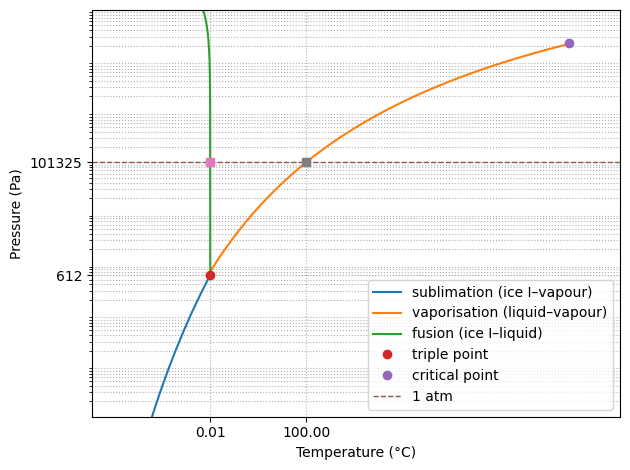

In [3]:
from myst_nb import glue
import numpy as np
import matplotlib.pyplot as plt
import math

# --- constants ---
T_TRIPLE = 273.16      # K
P_TRIPLE = 611.657     # Pa

T_CRIT   = 647.096     # K
P_CRIT   = 22.064e6    # Pa

R = 8.314462618        # J/mol/K

# Approx. enthalpies
DELTA_H_SUB = 51e3     # J/mol, sublimation (approx, assumed const)
DELTA_H_FUS = 333.5e3  # J/kg, fusion

# Densities at ~0°C (for fusion line)
RHO_L = 1000.0         # kg/m^3
RHO_S = 917.0          # kg/m^3

P_ATM = 101325.0       # Pa


# ---------- helper: find intersection with 1 atm for tabulated curve ----------
def find_intersections_with_pressure(T, P, P_target):
    T = np.asarray(T)
    P = np.asarray(P)

    intersections = []
    diff_sign = np.sign(P - P_target)
    changes = np.where(np.diff(diff_sign) != 0)[0]

    for i in changes:
        T0, T1 = T[i], T[i + 1]
        P0, P1 = P[i], P[i + 1]
        if P1 != P0:
            Ti = T0 + (P_target - P0) * (T1 - T0) / (P1 - P0)
            intersections.append(Ti)

    return intersections


# ---------- build the curves in K ----------
# Sublimation: solid -> vapour (Clausius–Clapeyron, constant ΔH_sub)
C_sub = np.log(P_TRIPLE) + DELTA_H_SUB / (R * T_TRIPLE)

T_sub = np.linspace(150.0, T_TRIPLE, 300, endpoint=False)  # K
P_sub = np.exp(-DELTA_H_SUB / (R * T_sub) + C_sub)         # Pa

# Vaporization: liquid -> vapour (Antoine; P in mmHg, T in °C)
# A chosen so that boiling at 1 atm is essentially 100 °C
A, B, C = 8.13776237, 1810.94, 244.485

T_lv_K  = np.linspace(T_TRIPLE, T_CRIT, 400)
T_lv_C  = T_lv_K - 273.15

P_lv_mmHg = 10**(A - B / (C + T_lv_C))
P_lv      = P_lv_mmHg * 133.322      # Pa

# Fusion: ice I <-> liquid, linearised near triple point via Clapeyron
dPdT_fus = DELTA_H_FUS / (T_TRIPLE * (1.0 / RHO_L - 1.0 / RHO_S))  # Pa/K
dTdP_fus = 1.0 / dPdT_fus                                           # K/Pa

P_fus = np.logspace(np.log10(P_TRIPLE), np.log10(200e6), 200)  # Pa
T_fus = T_TRIPLE + dTdP_fus * (P_fus - P_TRIPLE)               # K


# ---------- intersections with 1 atm ----------
# Melting point (ice I–liquid) at 1 atm (for marker only)
T_melt_list = find_intersections_with_pressure(T_fus, P_fus, P_ATM)
T_melt = T_melt_list[0] if T_melt_list else None

# Boiling point at 1 atm from Antoine, in °C (use analytically, not from grid)
P_target_mmHg = P_ATM / 133.322
T_boil_C = B / (A - math.log10(P_target_mmHg)) - C  # ≈ 100 °C

# Convert some to °C
T_TRIPLE_C = T_TRIPLE - 273.15
T_melt_C   = T_melt - 273.15 if T_melt is not None else None

T_sub_C = T_sub - 273.15
T_fus_C = T_fus - 273.15
T_lv_C  = T_lv_K - 273.15

# Overall x-range in °C
T_min_C = 150.0 - 273.15     # ≈ -123.15 °C
T_max_C = 700.0 - 273.15     # ≈ 426.85 °C


# ---------- plotting (x in °C, y in Pa) ----------

fig, ax = plt.subplots()

# Phase boundaries
ax.semilogy(T_sub_C, P_sub,  label="sublimation (ice I–vapour)")
ax.semilogy(T_lv_C,  P_lv,   label="vaporisation (liquid–vapour)")
ax.semilogy(T_fus_C, P_fus,  label="fusion (ice I–liquid)")

# Triple and critical points (x in °C)
ax.semilogy([T_TRIPLE_C],      [P_TRIPLE], "o", label="triple point")
ax.semilogy([T_CRIT - 273.15], [P_CRIT],   "o", label="critical point")

# 1 atm line
T_range_C = np.array([T_min_C, T_max_C])
ax.semilogy(T_range_C, [P_ATM, P_ATM], "--", linewidth=1, label="1 atm")

# Mark intersections with 1 atm (no text annotation)
if T_melt_C is not None:
    ax.semilogy([T_melt_C], [P_ATM], "s")          # ~0 °C at 1 atm
ax.semilogy([T_boil_C], [P_ATM], "s")              # 100 °C at 1 atm


# Axes limits: down to 10e-1 Pa
ax.set_xlim(T_min_C, T_max_C)
ax.set_ylim(10e-1, 1e8)  # 10e-1 = 1 Pa

ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Pressure (Pa)")

# ---------- ticks ----------
# x: ONLY triple point and boiling point (no tick at 0 °C/melting)
ticks = [(T_TRIPLE_C, f"{T_TRIPLE_C:.2f}"),
         (T_boil_C,   f"{T_boil_C:.2f}")]
ticks = sorted(ticks, key=lambda x: x[0])

ax.set_xticks([t[0] for t in ticks])
ax.set_xticklabels([t[1] for t in ticks])

# y: triple pressure and 1 atm
ax.set_yticks([P_TRIPLE, P_ATM])
ax.set_yticklabels([f"{P_TRIPLE:.0f}", f"{P_ATM:.0f}"])

ax.grid(True, which="both", ls=":")
ax.legend()
fig.tight_layout()

glue("pd_water_fig", fig, display=False)


````{admonition} Example 1
:class: example

How much energy is required to turn 200g of ice at $-10\ ^\circ C$ to vapour at $110 ^\circ C$?

<!-- 
```{glue:figure} pd_water_fig
:name: fig-pd-water
``` -->

```{figure} ../src/figures/2.7_phase_steps.png
:name: fig:phase_steps
```

1. Ice at $-10\ ^\circ C \rightarrow$ ice at $0\ ^\circ C$
2. Ice at $0\ ^\circ C \rightarrow$ water at $0\ ^\circ C$
3. Water at $0\ ^\circ C \rightarrow$ water at $100\ ^\circ C$
4. Water at $100\ ^\circ C \rightarrow$ vapour at $100\ ^\circ C$
5. Vapor at $100\ ^\circ C \rightarrow$ vapour at $110\ ^\circ C$

```{figure} ../src/figures/2.7_energy_fig.png
:name: fig:energy_fig
:width: 80%
```

$$

\begin{align}
Q &= Q_1 + Q_2 + Q_3 + Q_4 + Q_5 \\
&= c_{\text{ice}}m\Delta T + mL_f + c_{\text{water}}m\Delta T + mL_v + c_{\text{vapour}}m\Delta T \\
&= m(c_{\text{ice}}\Delta T + L_f + c_{\text{water}}\Delta T + L_v + c_{\text{vapour}}\Delta T) \\
&= 0.2 * ((2*10) + 333 + (4.2*100) + 2270 + (10 * 1.9)) \\
&= 600\ \text{kJ} 
\end{align}

$$
````

For a real material with a constant volume, we find that the state of matter normally relates to pressure and temperature like so:

In [4]:
import pandas as pd

df = pd.DataFrame(
    [["high", "high", "low"],
     ["low",  "high", "high"]],
    columns=["Solid", "Liquid", "Gas"]
)

df.index = ["Pressure", "Temperature"]
df.columns.name = "Phase"

df


Phase,Solid,Liquid,Gas
Pressure,high,high,low
Temperature,low,high,high


As such, you'll see in these diagrams that solids tend to occupy the top-left, liquids the top-right, and gases the bottom-right.

````{admonition} Example 2
:class: example

How much ice at $-10\ ^\circ C$ do you need to bring 500g of liquid water at $60\ ^\circ C$ to $0\ ^\circ C$?

We have two systems,

1. ? grams of ice at $-10\ ^\circ C$
2. 500 grams of water at $60\ ^\circ C$

Let's consider what we're adding to the water

$$
\begin{align}
Q_\text{in}&=c_\text{water} m \Delta T \\
&=m(c_\text{water}\Delta T) \\
&=500\ \text{g}*4\ \text{J g}^{-1}\ \text{K}^{-1}*(-60\ \text{K}) \\
&=-126\ \text{k J} \\
&=-Q_\text{out} \rightarrow Q_\text{out}=126\ kJ.
\end{align}
$$

The heat out of the water goes into the ice.

$$
\begin{align}
Q_\text{out, water}&=Q_\text{in, ice} \\
&=m*(c_\text{ice} \Delta T + L_f) \\
&=m*(2.05 * 10 + 333) \\
126\ \text{kJ}&=m*353.5 \text{kJ kg}^{-1} \\
m&=\frac{126}{353}=0.36\ \text{kg}
\end{align}
$$

### Newton's law of cooling

Let's say we have two systems that can exchange heat. System one is at temperature T at the start, but it will tend towards T<sub>env</sub> as time evolves.

```{figure} ../src/figures/2.7_cooling.png
:name: fig:cooling
:width: 70%
```

Heat Q leaves the system with temperature T but the environment is so large that T<sub>env</sub> is constant. What is T as a function of time, i.e., what is $T(t)$?

Newton's cooling equation tells us that the heat lost per unit time is proportional to the temperature difference between the two systems.

$$\frac{dQ}{dT}=-a(T(t)-T_{env})$$

- where $T(t)$ is the temperature as a function of time
- and $T_{env}$ is the temperature of the environment.

<!-- STUFF ABOUT FIRST LAW WHICH WE HAVE NOT COVERED YET -->

## Mechanisms of Heat Transfer

Heat transfer occurs by **conduction, convection, and radiation**. 

### Conduction 

Conduction is the transfer of heat through a material in contact. It depends on the motion of particles that carry energy from one region to another. When one end of a metal rod is placed in a flame, the other end soon becomes hot because energy is transmitted alongthe rod by molecular and electronic collisions. The rate of heat flow through a material is proportional to the temperature difference and inversely proportional to the length through which the heat flows. 

For a temperature variation along a conducting rod, 

$$ H = \frac{dQ}{dt} = kA\frac{T_h - T_c}{L} $$

- where $k$ is the thermal conductivity,
- $A$ is the cross-sectional area, 
- $T_h$ is the hot end of the rod,
- $T_c$ is the cold end
- and $L$ is length of rod. 

"Dead" air, wool, Styrofoam, and fiberglass are good insulators because they have low thermal conductivity while metals like aluminium and copper have high thermal conductivities ([see here for some examples](https://en.wikipedia.org/wiki/List_of_thermal_conductivities)).

### Convection

Convection is the transfer of heat by the mass motion of a fluid from one region to another. Examples include hot-air and hot-water heating systems, the cooling system of a car engine, and the circulation of blood in the body. There exists two types of convwiection:

- *Natural (free) convection*: where motion arises from density differences caused by temperature gradients. As warmer fluids become less dense, cooler fluids sink and heat is transferred.
- *Forced convection*: where motion is imposed by an external mechanism, i.e. a pump, fan or some form of mechanical movement. The movement of the fluid in this case is not driven by density or buoyancy, and instead by mechanical work applied to the system.

### Radiation

Radiation transfers heat by electromagnetic waves such as infrared and visible light. It occurs even through a vacuum, as in heat from the Sun or a fire. All objects emit radiation depending on temperature: mainly infrared at room temperature, red-hot at 800°C, and white-hot near 3000°C, with the following rate:

$$ H = Ae\sigma T^4 $$

- where $H$ is the heat current in radiation,
- $A$ is the area of the emitting surface,
- $e$ is the emissivity of the surface,
- $\sigma$ is the Stefan-Boltzmann constant,
- and $T$ is the absolute temperature of the surface.

This relationship is called the **Stefan-Boltzmann law** in honour of its late-19th century discoverers. The **Stefan-Boltzmann constant** $\sigma$ (Greek sigma) is a fundamental constant with numerical value:

$$ \sigma = 5.67037442 * 10^{-8} \text{Wm}^{-2}\text{K}^4 $$

You should check for unit consistency in the Stefan-Boltzmann law. Emissivity ($e$) is often larger for dark surfaces than light ones. The emissivity of a smooth copper surface is about 0.3, but $e$ for a dull black surface can be close to unity.